In [5]:
import gym
import numpy as np 
import matplotlib.pyplot as plt
import time

In [6]:
# CART POLE
env = gym.make('CartPole-v0')
print(env.observation_space.low,"\n",env.observation_space.high)
def Qtable(state_space,action_space,bin_size = 30):
    
    bins = [np.linspace(-4.8,4.8,bin_size),
            np.linspace(-4,4,bin_size),
            np.linspace(-0.418,0.418,bin_size),
            np.linspace(-4,4,bin_size)]
    
    q_table = np.random.uniform(low=-1,high=1,size=([bin_size] * state_space + [action_space]))
    return q_table, bins

def Discrete(state, bins):
    index = []
    for i in range(len(state)): index.append(np.digitize(state[i],bins[i]) - 1)
    return tuple(index)


[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] 
 [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


Episode : 500 | Reward -> 42.143 | Max reward : 183.5 | Time : 0.013245344161987305
Solved in episode : 514 in time 9.369850158691406e-05
Episode : 1000 | Reward -> 90.739 | Max reward : 262.5 | Time : 0.009676456451416016
Episode : 1500 | Reward -> 110.778 | Max reward : 272.5 | Time : 0.015607833862304688
Episode : 2000 | Reward -> 124.131 | Max reward : 267.5 | Time : 0.015491724014282227
Episode : 2500 | Reward -> 140.181 | Max reward : 270.0 | Time : 0.01734614372253418
Episode : 3000 | Reward -> 137.528 | Max reward : 281.0 | Time : 0.028690099716186523
Episode : 3500 | Reward -> 141.718 | Max reward : 280.0 | Time : 0.015401840209960938
Episode : 4000 | Reward -> 157.74 | Max reward : 279.0 | Time : 0.0059299468994140625
Episode : 4500 | Reward -> 159.261 | Max reward : 281.0 | Time : 0.014749765396118164
Episode : 5000 | Reward -> 172.438 | Max reward : 280.0 | Time : 0.01757359504699707
Episode : 5500 | Reward -> 178.469 | Max reward : 287.5 | Time : 0.015363216400146484
Episo

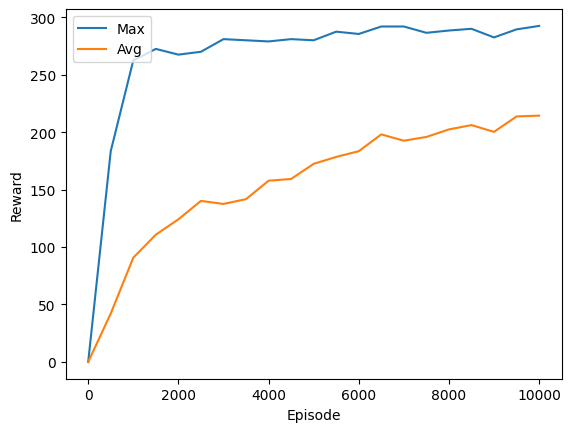

In [17]:
# TRANING
q_table, bins = Qtable(len(env.observation_space.low), env.action_space.n)

Q_learning(q_table, bins, lr = 0.15, gamma = 0.995, episodes = 10*10**3, timestep = 500)

In [15]:
def Q_learning(q_table, bins, episodes = 5000, gamma = 0.95, lr = 0.1, timestep = 5000, epsilon = 0.2):
    rewards = 0
    solved = False 
    steps = 0 
    runs = [0]
    data = {'max' : [0], 'avg' : [0]}
    start = time.time()
    ep = [i for i in range(0,episodes + 1,timestep)] 
    
    for episode in range(1,episodes+1):
        
        current_state = Discrete(env.reset(),bins) # initial observation
        score = 0
        done = False
        temp_start = time.time()
        
        while not done:
            steps += 1 
            ep_start = time.time()
            if episode%timestep == 0:
                env.render()
                
            if np.random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[current_state])
            
            observation, reward, done, info = env.step(action)
            next_state = Discrete(observation,bins)

            #benifit if moving to the right direction
            if observation[1] > 0:
                reward = reward*1.5
                
            score += reward
    


            if not done:
                max_future_q = np.max(q_table[next_state])
                current_q = q_table[current_state+(action,)]
                new_q = (1-lr)*current_q + lr*(reward + gamma*max_future_q)
                q_table[current_state+(action,)] = new_q

            current_state = next_state
            
        # End of the loop update
        else:
            rewards += score
            runs.append(score)
            if score > 195 and steps >= 100 and solved == False: # considered as a solved:
                solved = True
                print('Solved in episode : {} in time {}'.format(episode, (time.time()-ep_start)))
        
        # Timestep value update
        if episode%timestep == 0:
            print('Episode : {} | Reward -> {} | Max reward : {} | Time : {}'.format(episode,rewards/timestep, max(runs), time.time() - ep_start))
            data['max'].append(max(runs))
            data['avg'].append(rewards/timestep)
            if rewards/timestep >= 195: 
                print('Solved in episode : {}'.format(episode))
            rewards, runs= 0, [0] 
            
    if len(ep) == len(data['max']):
        plt.plot(ep, data['max'], label = 'Max')
        plt.plot(ep, data['avg'], label = 'Avg')
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.legend(loc = "upper left")
        
    env.close()